In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


import warnings
warnings.filterwarnings('ignore')

In [3]:
from sklearn.datasets import fetch_california_housing

In [5]:
data = fetch_california_housing(as_frame=True)

In [11]:
df = data.frame


In [13]:
df = df.sample(1000, random_state=42)


In [15]:
df

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
20046,1.6812,25.0,4.192201,1.022284,1392.0,3.877437,36.06,-119.01,0.47700
3024,2.5313,30.0,5.039384,1.193493,1565.0,2.679795,35.14,-119.46,0.45800
15663,3.4801,52.0,3.977155,1.185877,1310.0,1.360332,37.80,-122.44,5.00001
20484,5.7376,17.0,6.163636,1.020202,1705.0,3.444444,34.28,-118.72,2.18600
9814,3.7250,34.0,5.492991,1.028037,1063.0,2.483645,36.62,-121.93,2.78000
...,...,...,...,...,...,...,...,...,...
10129,5.4617,17.0,5.487850,1.037383,1381.0,2.581308,33.92,-117.89,1.90300
2457,3.1333,30.0,5.925532,1.131206,966.0,3.425532,36.51,-119.65,1.00000
7223,1.8715,34.0,2.942116,1.019960,1962.0,3.916168,34.02,-118.16,1.39600
4045,10.6796,28.0,8.406176,1.047506,1190.0,2.826603,34.14,-118.49,5.00001


In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1000 entries, 20046 to 18609
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   MedInc       1000 non-null   float64
 1   HouseAge     1000 non-null   float64
 2   AveRooms     1000 non-null   float64
 3   AveBedrms    1000 non-null   float64
 4   Population   1000 non-null   float64
 5   AveOccup     1000 non-null   float64
 6   Latitude     1000 non-null   float64
 7   Longitude    1000 non-null   float64
 8   MedHouseVal  1000 non-null   float64
dtypes: float64(9)
memory usage: 78.1 KB


In [23]:
df.dropna()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
20046,1.6812,25.0,4.192201,1.022284,1392.0,3.877437,36.06,-119.01,0.47700
3024,2.5313,30.0,5.039384,1.193493,1565.0,2.679795,35.14,-119.46,0.45800
15663,3.4801,52.0,3.977155,1.185877,1310.0,1.360332,37.80,-122.44,5.00001
20484,5.7376,17.0,6.163636,1.020202,1705.0,3.444444,34.28,-118.72,2.18600
9814,3.7250,34.0,5.492991,1.028037,1063.0,2.483645,36.62,-121.93,2.78000
...,...,...,...,...,...,...,...,...,...
10129,5.4617,17.0,5.487850,1.037383,1381.0,2.581308,33.92,-117.89,1.90300
2457,3.1333,30.0,5.925532,1.131206,966.0,3.425532,36.51,-119.65,1.00000
7223,1.8715,34.0,2.942116,1.019960,1962.0,3.916168,34.02,-118.16,1.39600
4045,10.6796,28.0,8.406176,1.047506,1190.0,2.826603,34.14,-118.49,5.00001


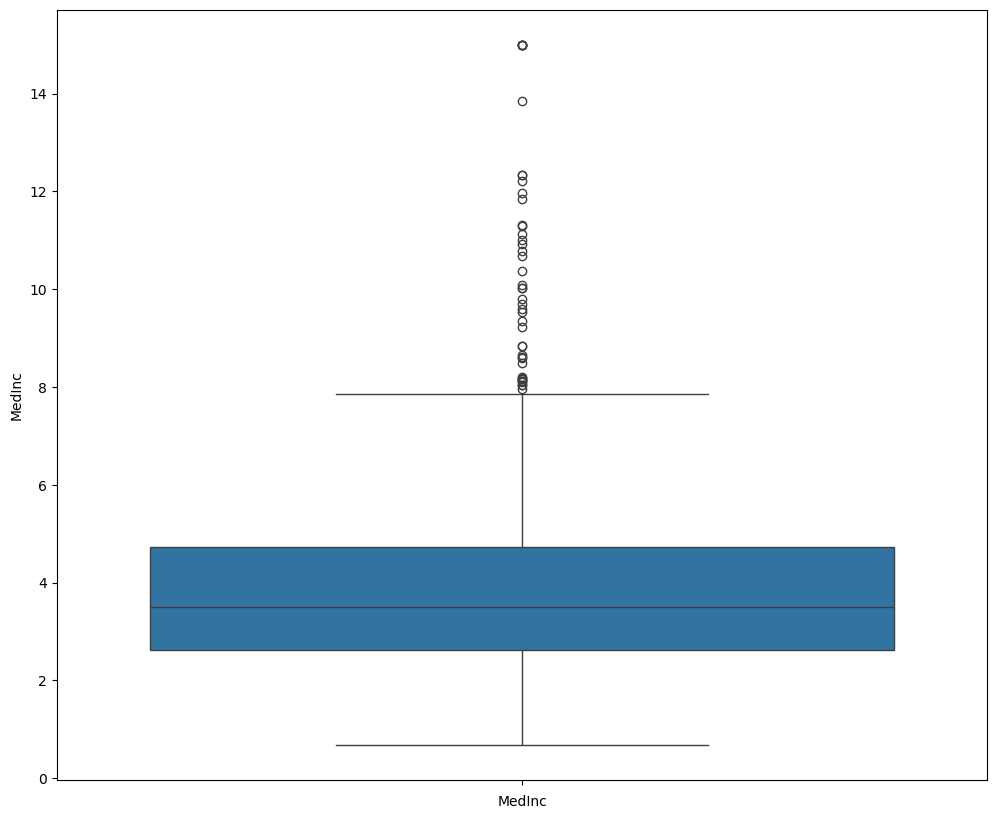

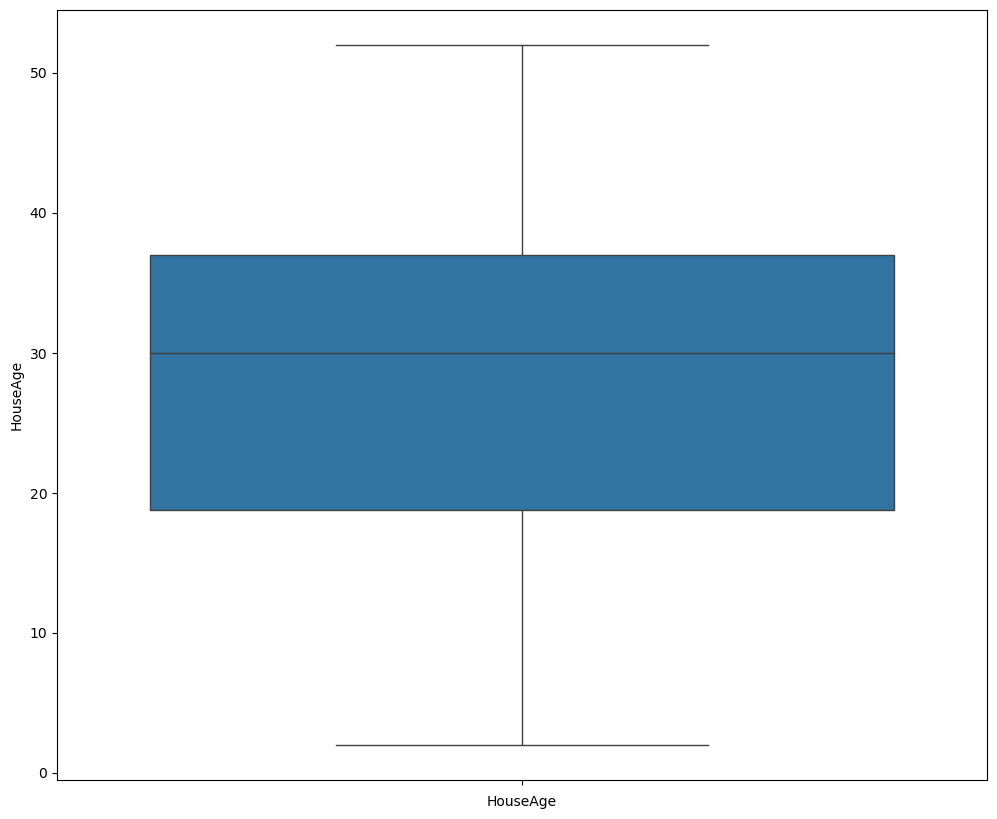

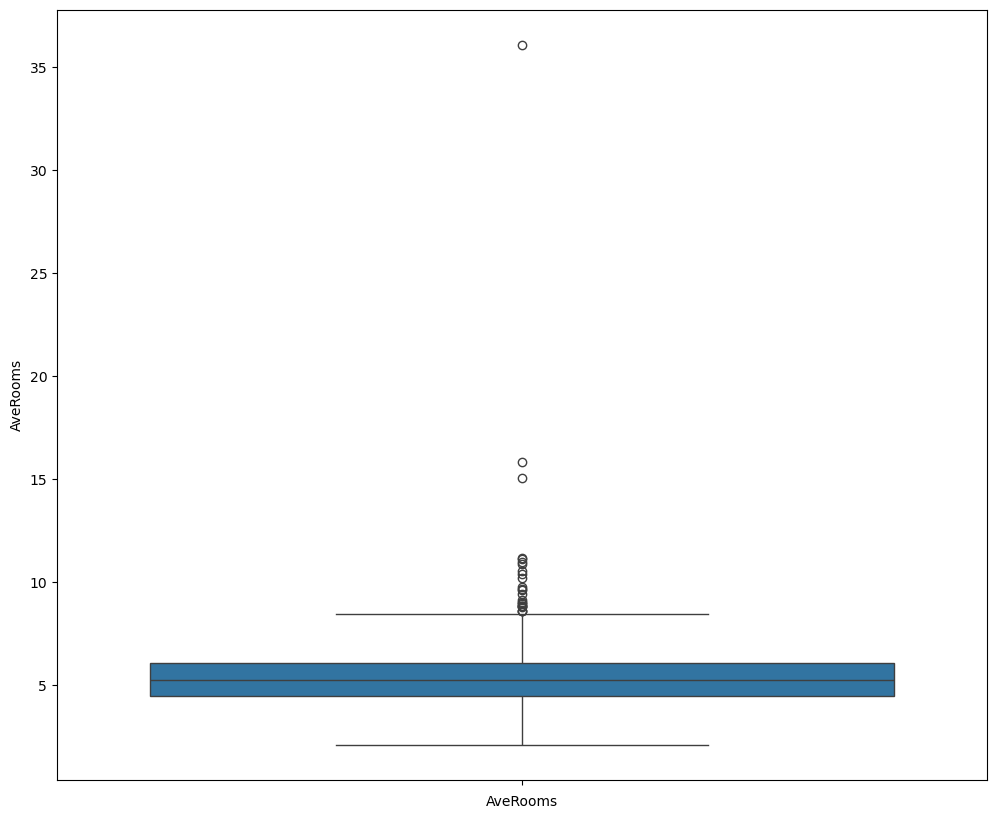

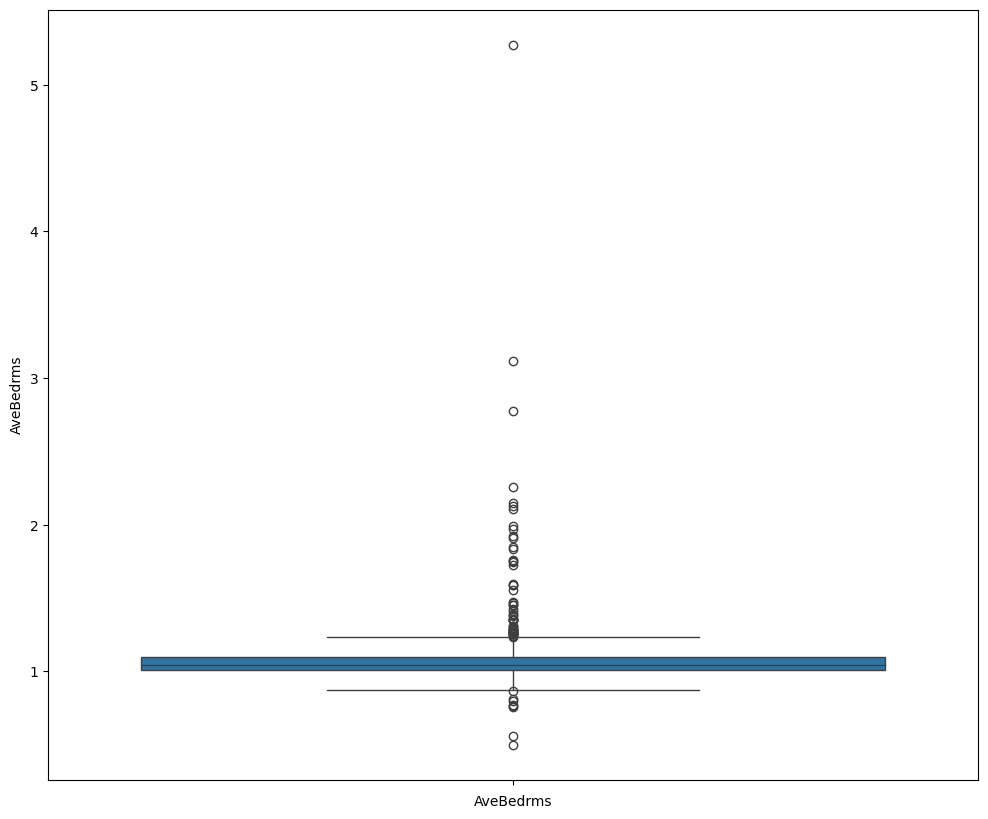

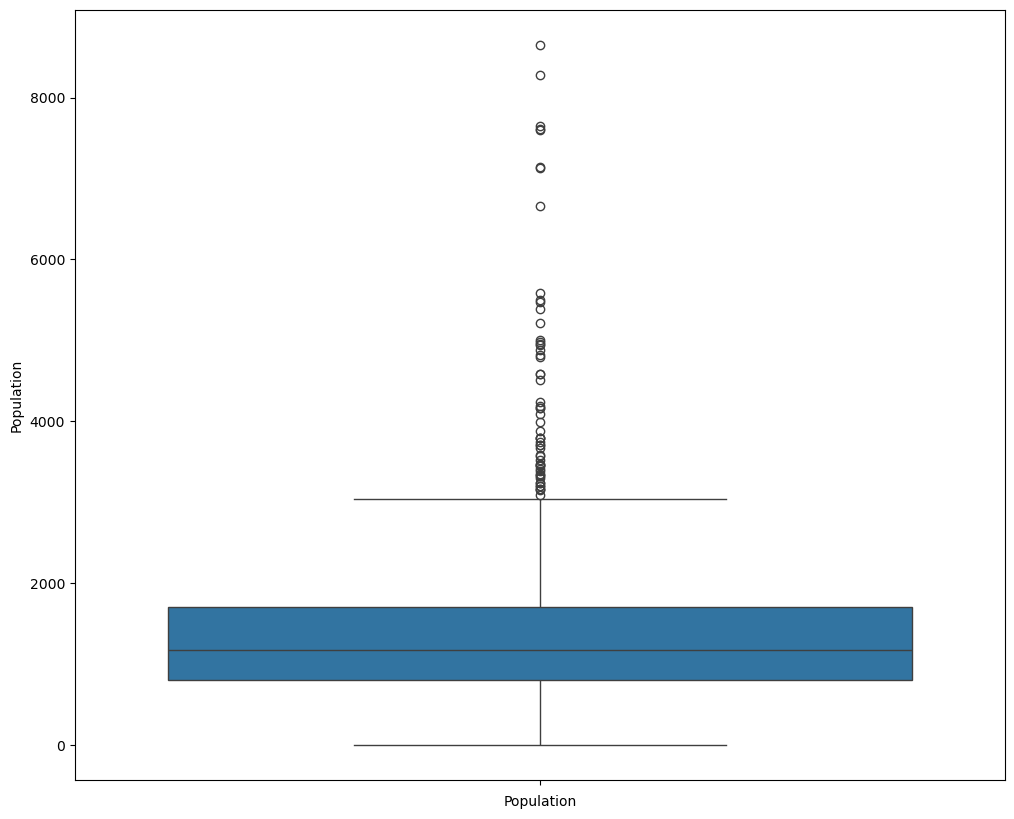

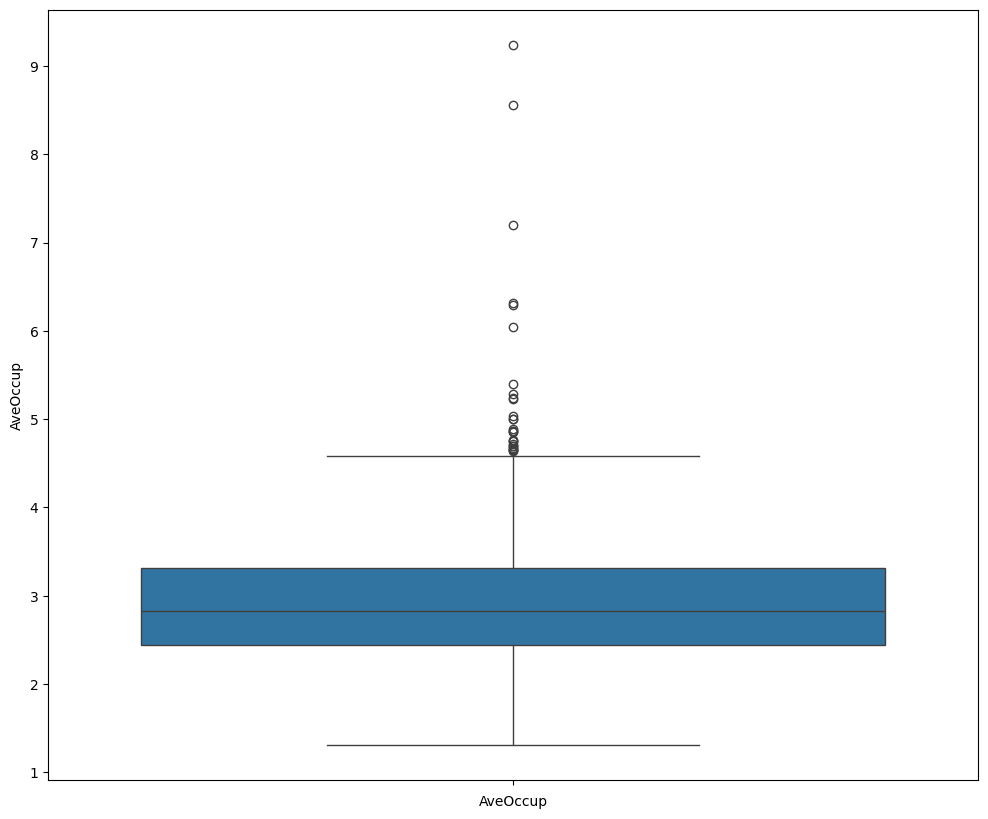

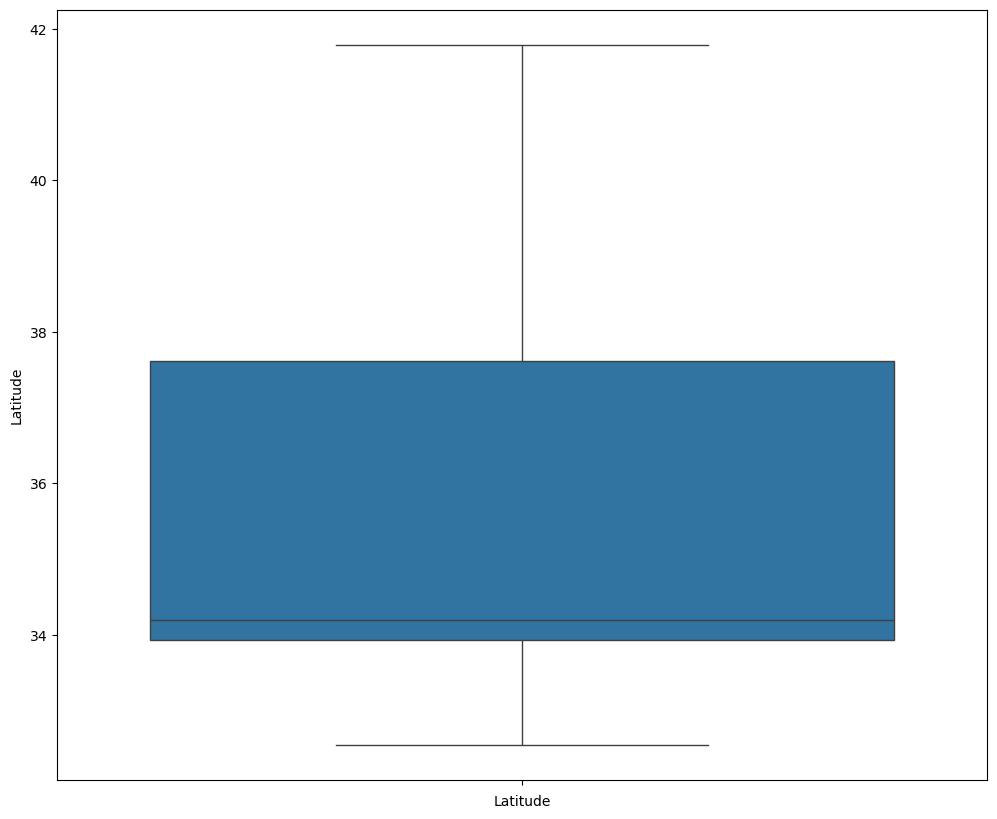

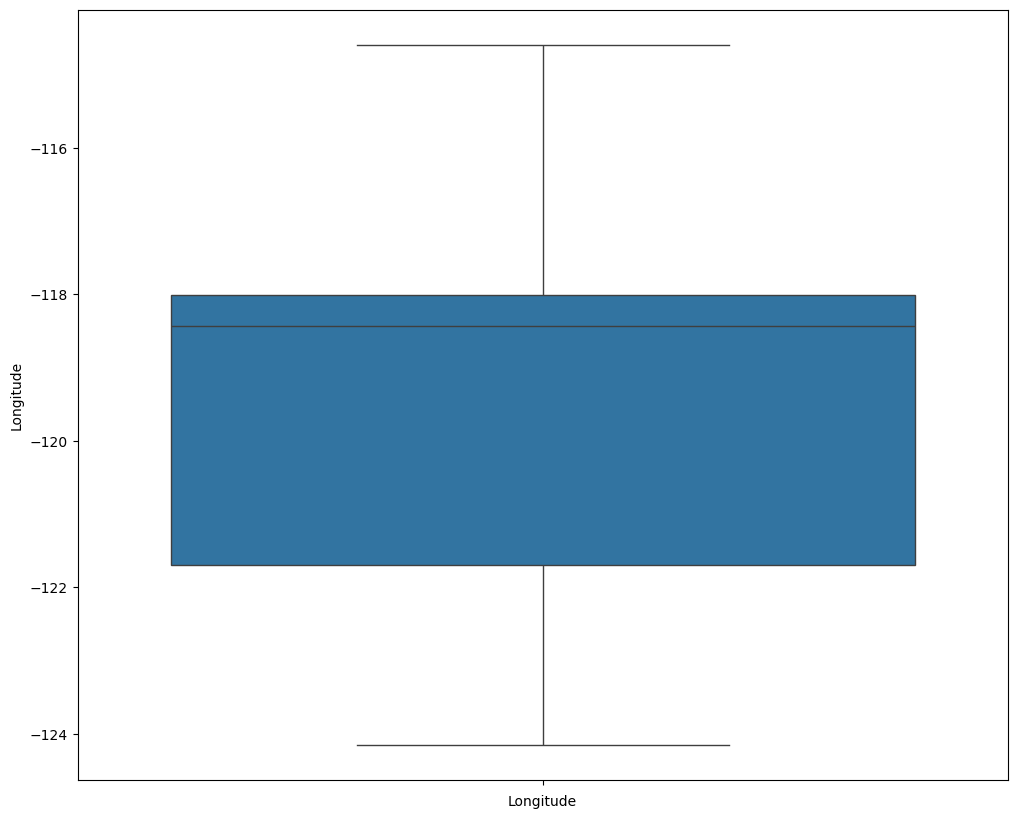

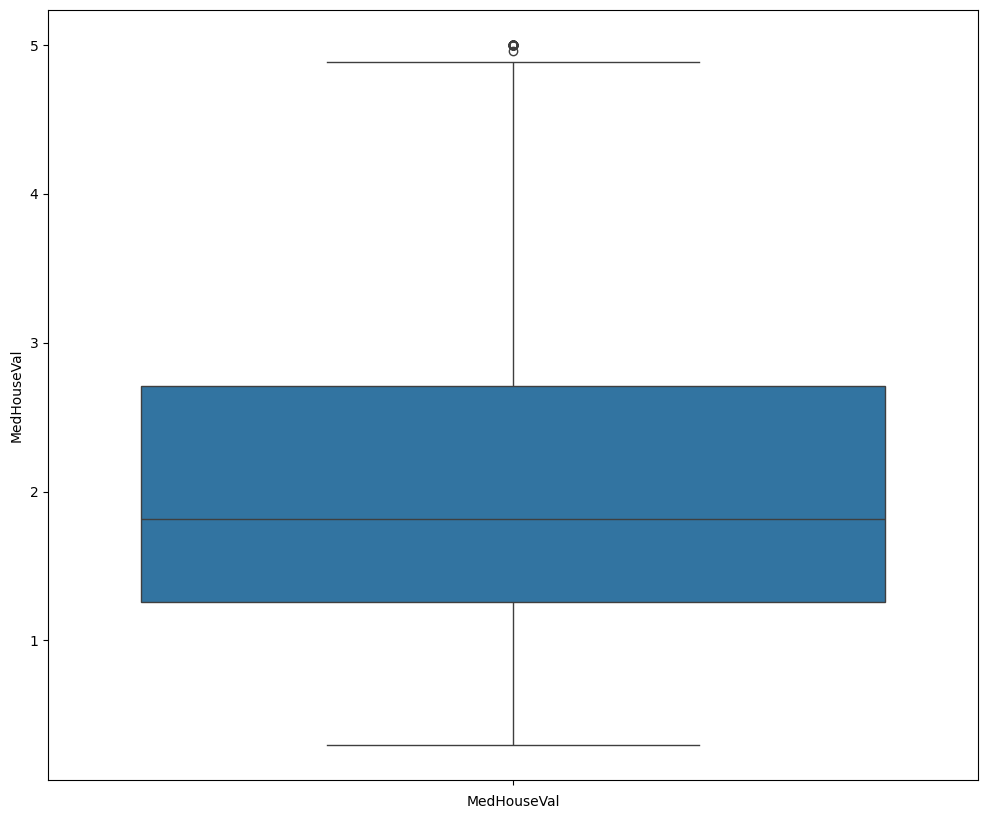

In [27]:
for i in df.columns:
    plt.figure(figsize=(12,10))
    sns.boxplot(df[i])
    plt.xlabel(i)

In [29]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

X = df.drop('MedHouseVal', axis=1)
y = df['MedHouseVal']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LinearRegression()
model.fit(X_train, y_train)

pred = model.predict(X_test)
print("R2 Score:", r2_score(y_test, pred))


R2 Score: 0.6619396252327445


In [31]:
outlier_index = []

for col in df.columns:
    if df[col].dtype != 'object':   # only numerical columns
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1

        lower = Q1 - 1.5 * IQR
        upper = Q3 + 1.5 * IQR

        idx = df[(df[col] < lower) | (df[col] > upper)].index
        outlier_index.extend(idx)

outlier_index = list(set(outlier_index))  # unique indexes
print("Total outliers:", len(outlier_index))


Total outliers: 213


In [33]:
df = df.drop(outlier_index)


In [35]:
df

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
20046,1.6812,25.0,4.192201,1.022284,1392.0,3.877437,36.06,-119.01,0.477
3024,2.5313,30.0,5.039384,1.193493,1565.0,2.679795,35.14,-119.46,0.458
20484,5.7376,17.0,6.163636,1.020202,1705.0,3.444444,34.28,-118.72,2.186
9814,3.7250,34.0,5.492991,1.028037,1063.0,2.483645,36.62,-121.93,2.780
13311,4.7147,12.0,5.251483,0.975089,2400.0,2.846975,34.08,-117.61,1.587
...,...,...,...,...,...,...,...,...,...
13827,3.2050,7.0,5.609428,1.069585,2764.0,3.102132,34.48,-117.20,1.019
9143,4.5769,32.0,6.341137,1.143813,806.0,2.695652,34.48,-117.96,1.594
10129,5.4617,17.0,5.487850,1.037383,1381.0,2.581308,33.92,-117.89,1.903
2457,3.1333,30.0,5.925532,1.131206,966.0,3.425532,36.51,-119.65,1.000


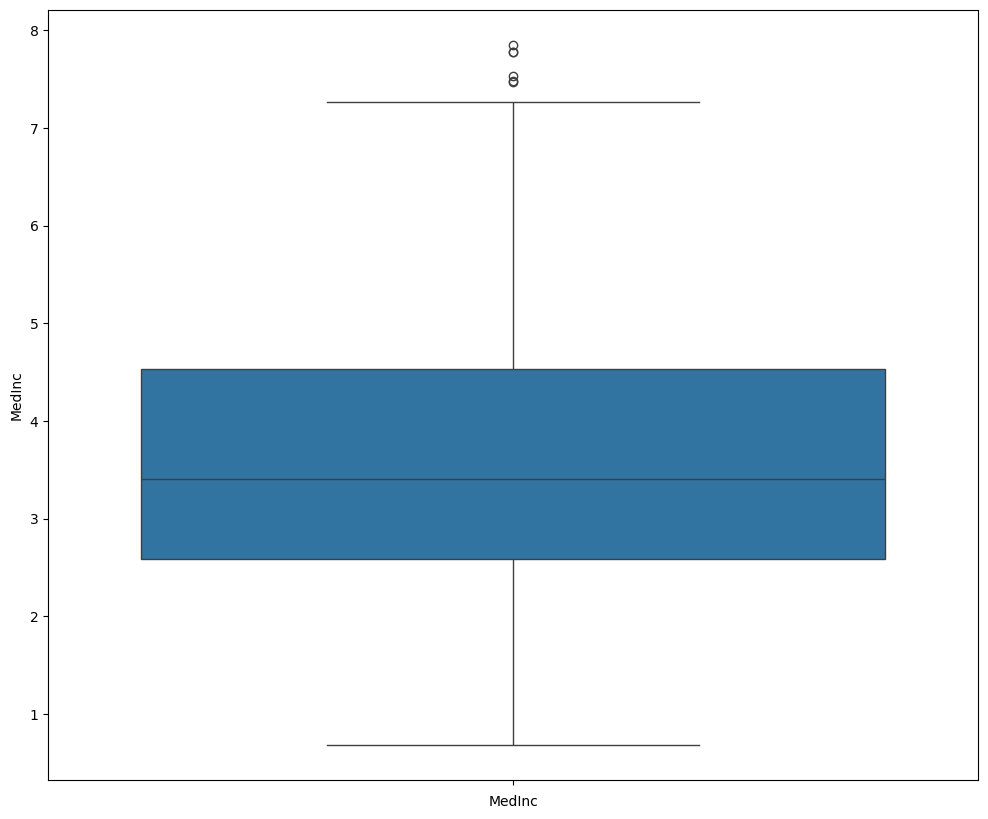

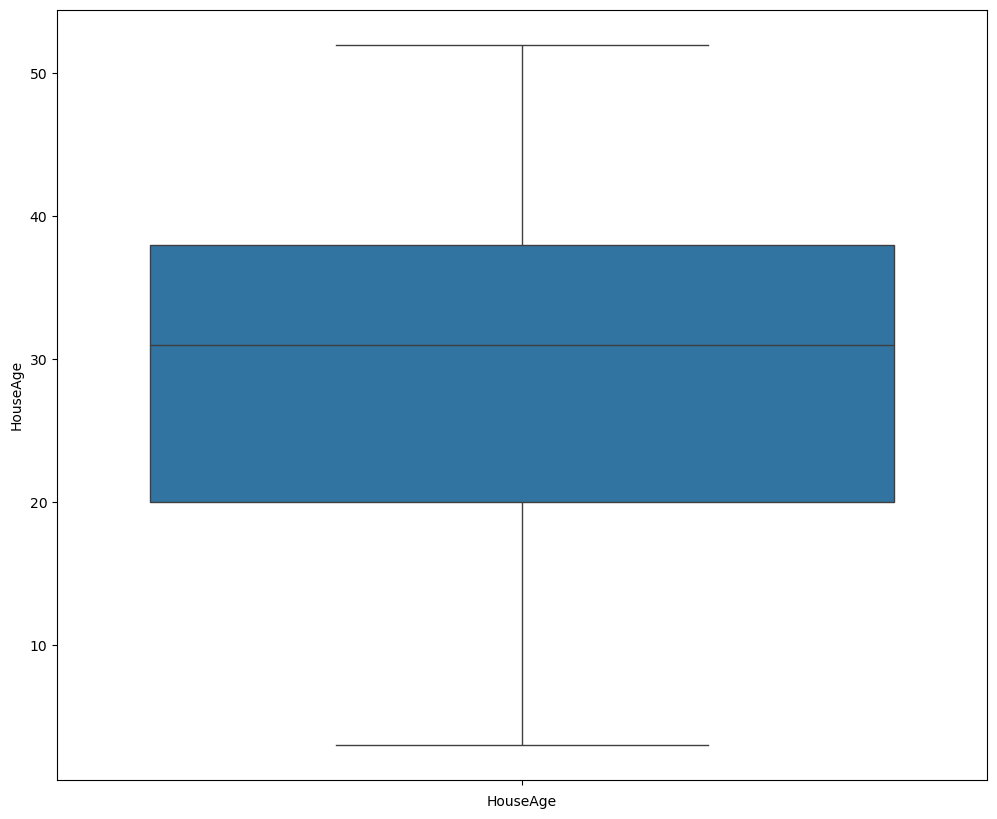

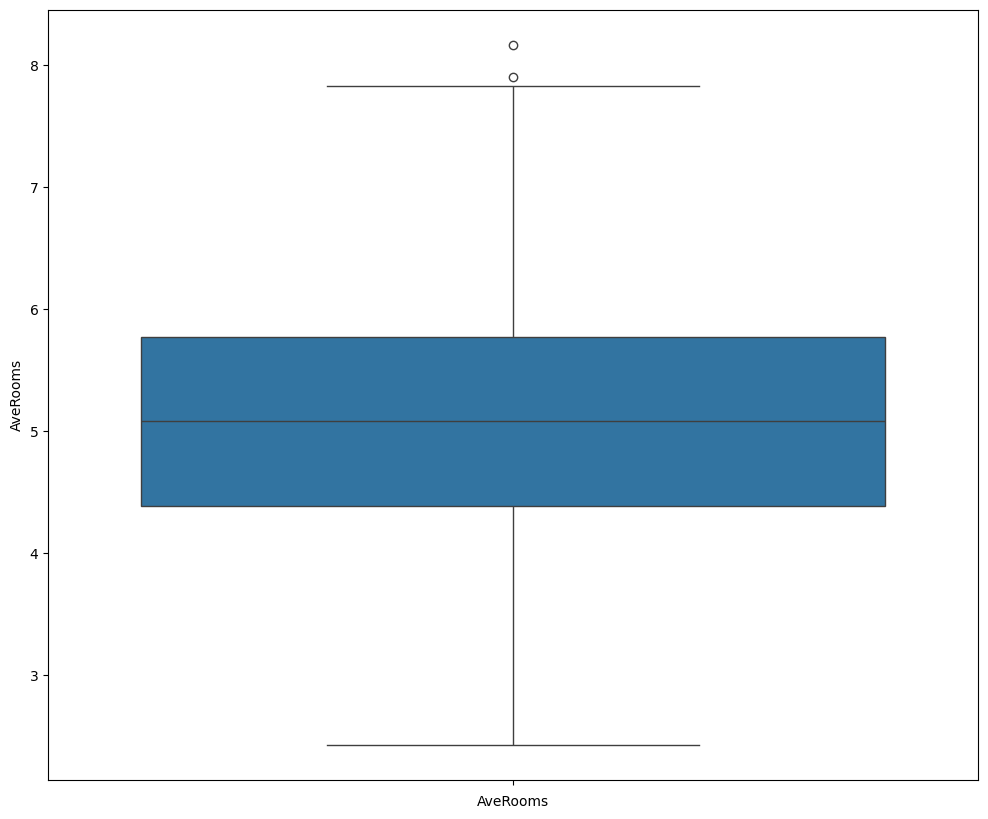

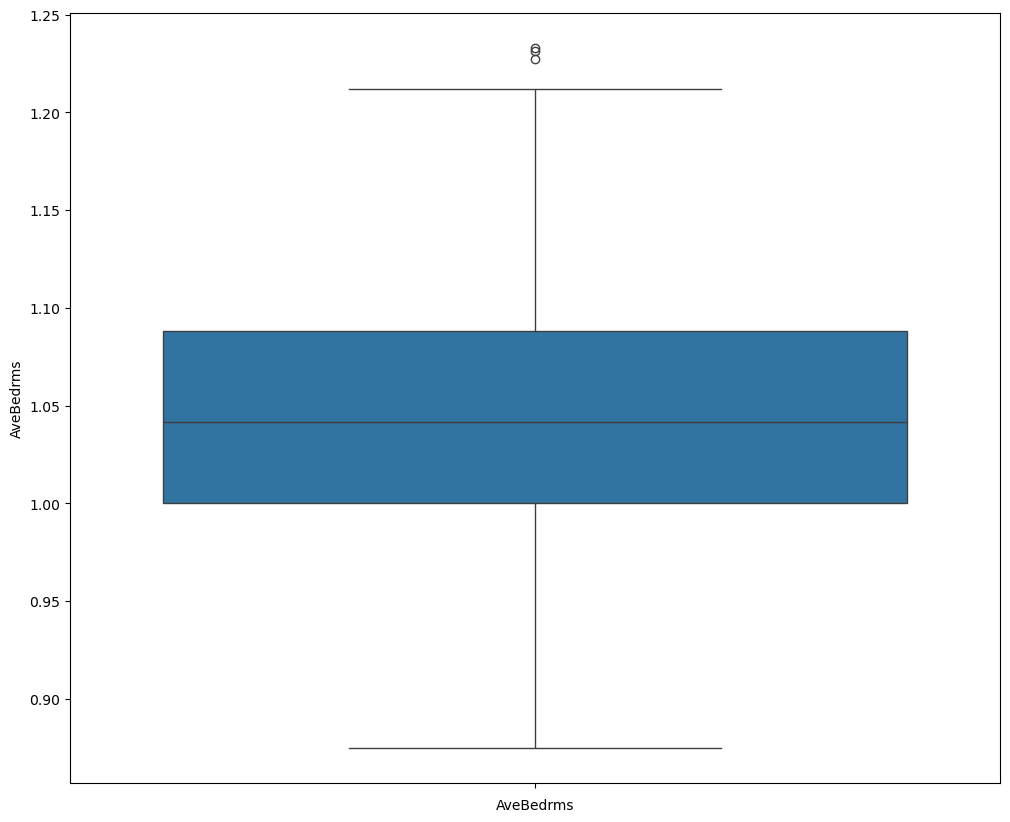

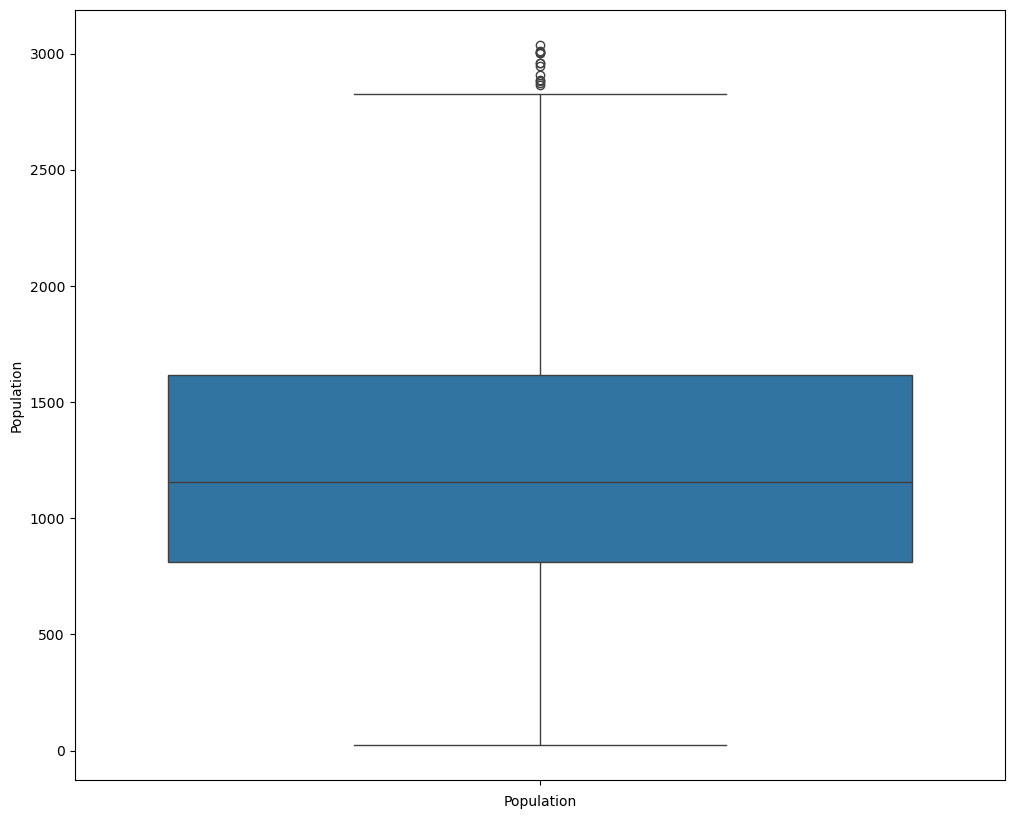

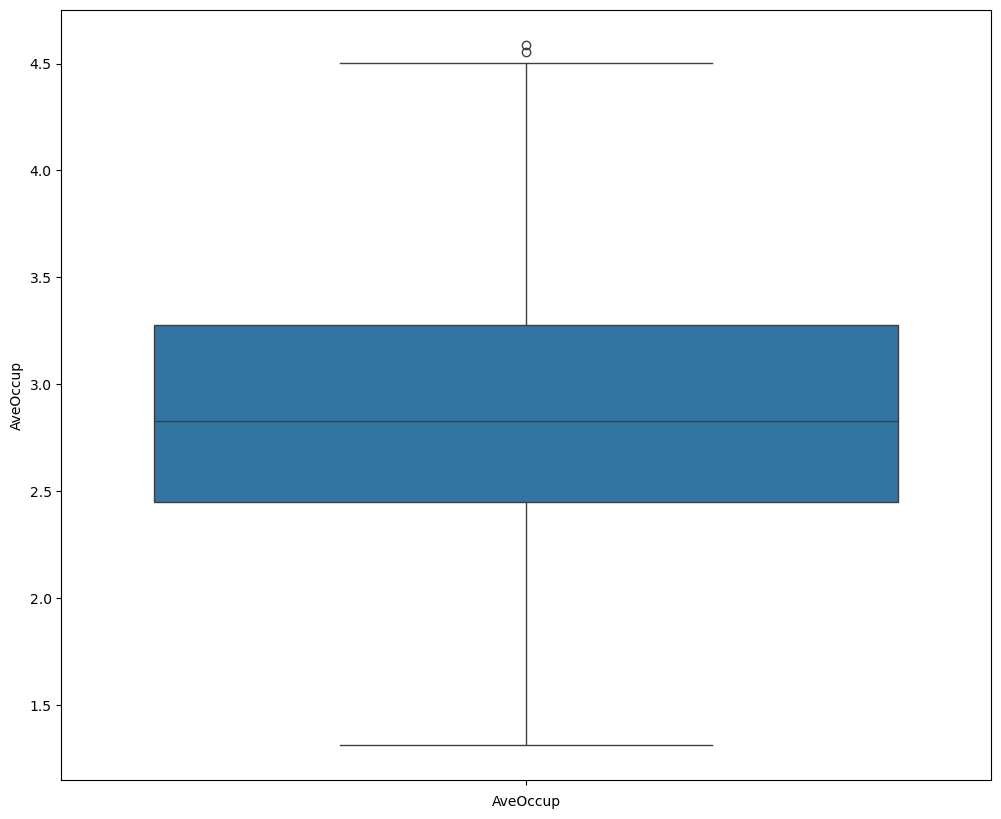

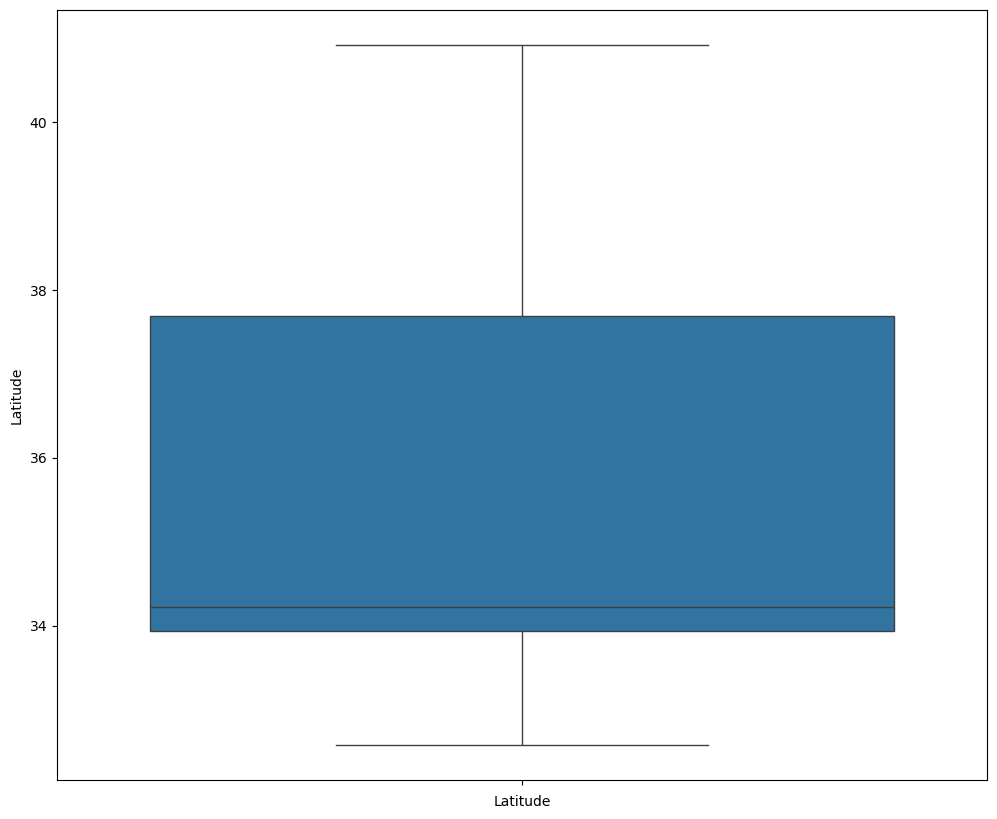

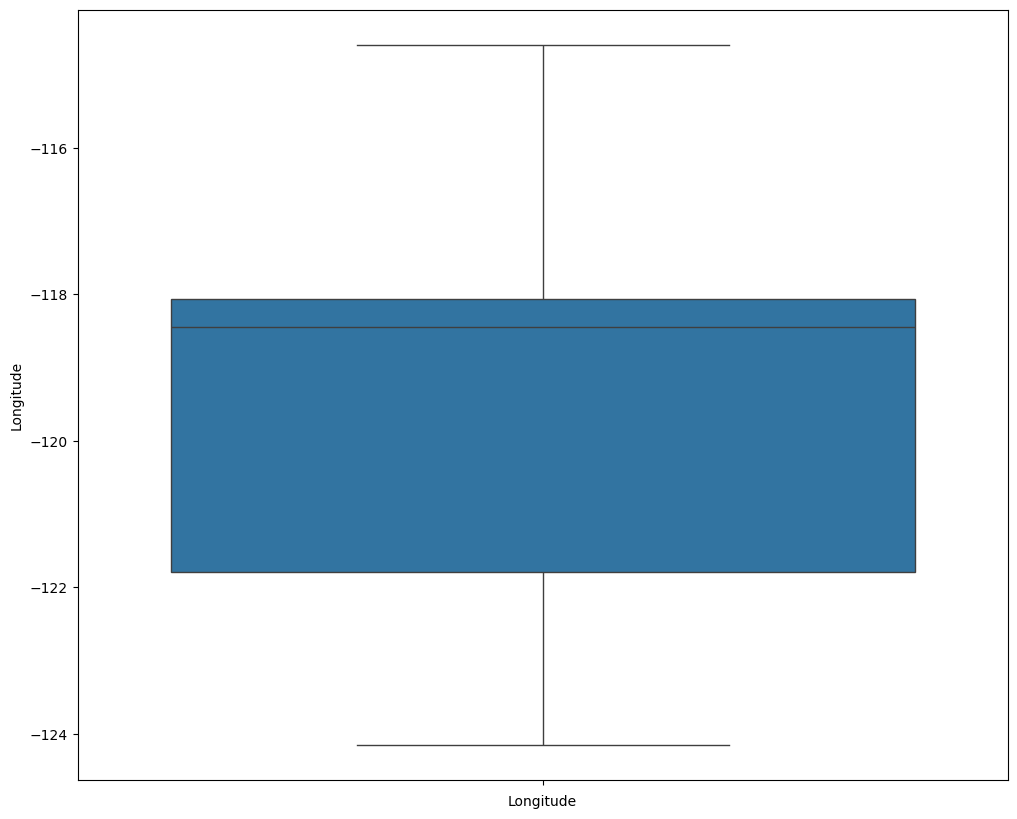

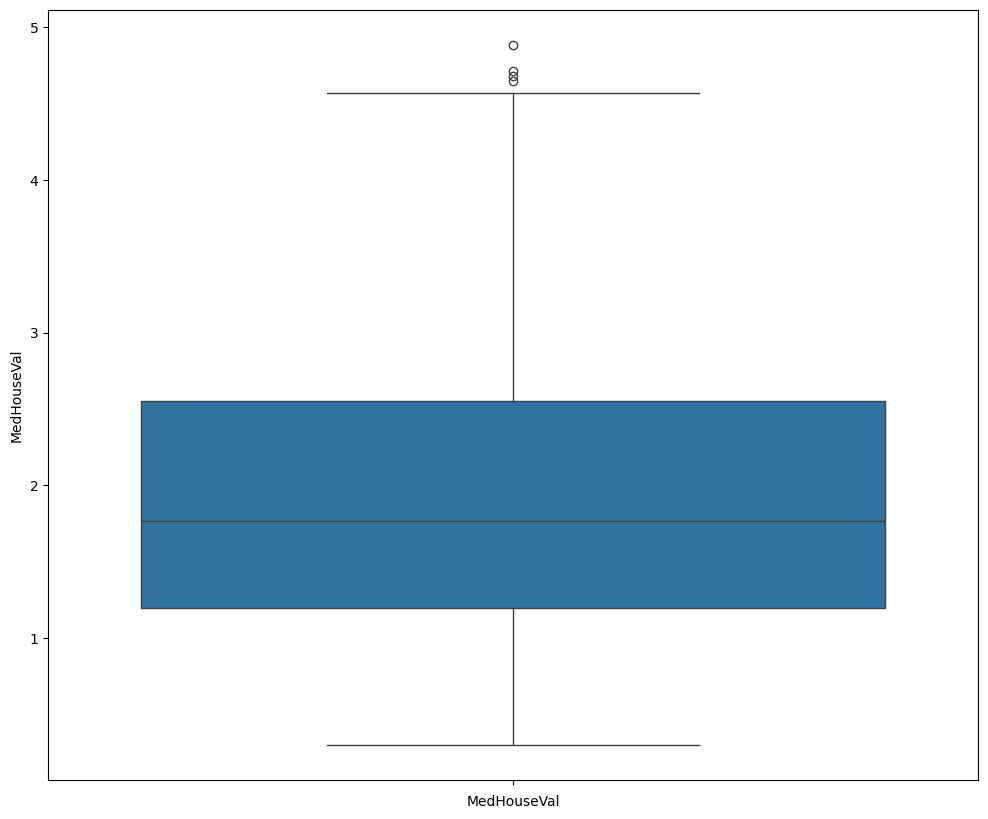

In [37]:
for i in df.columns:
    plt.figure(figsize=(12,10))
    sns.boxplot(df[i])
    plt.xlabel(i)

R2 Score: 0.5510655477147913


In [41]:
from sklearn.datasets import fetch_california_housing

In [43]:
data = fetch_california_housing(as_frame=True)

In [45]:
df = data.frame


In [47]:
df

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422
...,...,...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09,0.781
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21,0.771
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22,0.923
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32,0.847


In [51]:
df.isna().sum()

MedInc         0
HouseAge       0
AveRooms       0
AveBedrms      0
Population     0
AveOccup       0
Latitude       0
Longitude      0
MedHouseVal    0
dtype: int64

In [55]:
df.duplicated().sum()

0

In [57]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   MedInc       20640 non-null  float64
 1   HouseAge     20640 non-null  float64
 2   AveRooms     20640 non-null  float64
 3   AveBedrms    20640 non-null  float64
 4   Population   20640 non-null  float64
 5   AveOccup     20640 non-null  float64
 6   Latitude     20640 non-null  float64
 7   Longitude    20640 non-null  float64
 8   MedHouseVal  20640 non-null  float64
dtypes: float64(9)
memory usage: 1.4 MB


In [59]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

X = df.drop('MedHouseVal', axis=1)
y = df['MedHouseVal']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LinearRegression()
model.fit(X_train, y_train)

pred = model.predict(X_test)
print("R2 Score:", r2_score(y_test, pred))

R2 Score: 0.5757877060324514


In [61]:
outlier_index = []

for col in df.columns:
    if df[col].dtype != 'object':   # only numerical columns
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1

        lower = Q1 - 1.5 * IQR
        upper = Q3 + 1.5 * IQR

        idx = df[(df[col] < lower) | (df[col] > upper)].index
        outlier_index.extend(idx)

outlier_index = list(set(outlier_index))  # unique indexes
print("Total outliers:", len(outlier_index))


Total outliers: 4328


In [63]:
df = df.drop(outlier_index)

In [65]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

X = df.drop('MedHouseVal', axis=1)
y = df['MedHouseVal']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LinearRegression()
model.fit(X_train, y_train)

pred = model.predict(X_test)
print("R2 Score:", r2_score(y_test, pred))

R2 Score: 0.6378964374821553


In [70]:
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor(
    n_estimators=300,
    max_depth=20,
    random_state=42,
    n_jobs=-1
)
rf.fit(X_train, y_train)
pred = rf.predict(X_test)

from sklearn.metrics import r2_score
print(r2_score(y_test, pred))


0.7976609767843363


In [72]:
# BEFORE WE WHERE USING THE LINEAR REGRESSION THAT TO ON 1000 ROWS ONLY , BUT NOW WE HAVE USED ALL THE rows then we used the random forest regressor

In [ ]:
# ACCURACY IMPROVED FROM 0.6 TO 0.8 